# Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd
data=pd.read_csv("Titanic_train.csv")

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Explore data distributions using histograms and box plots.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

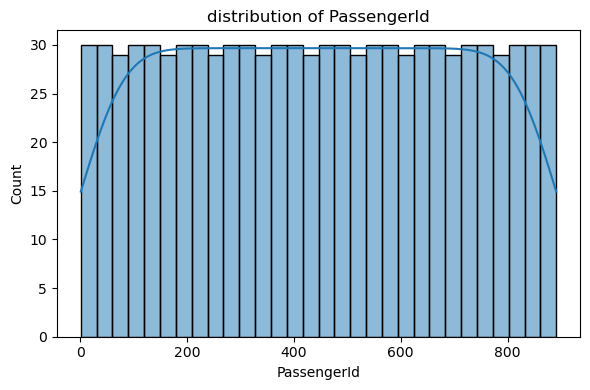

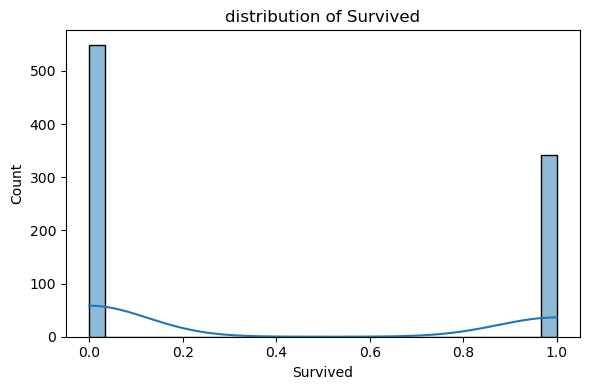

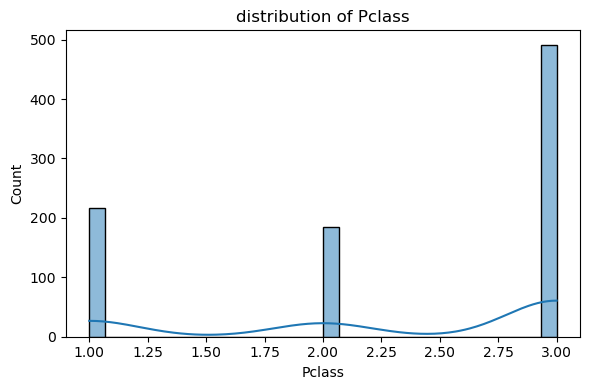

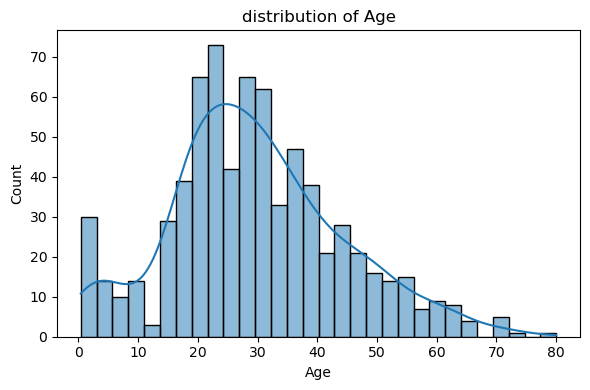

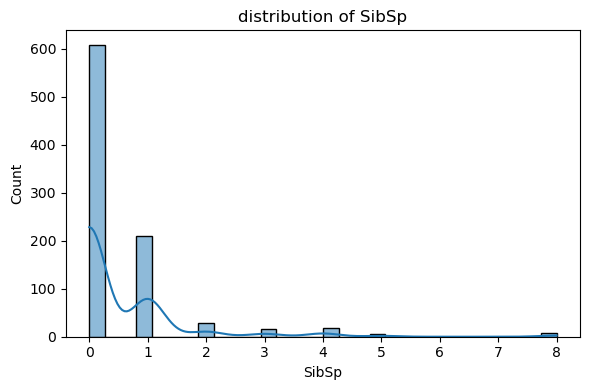

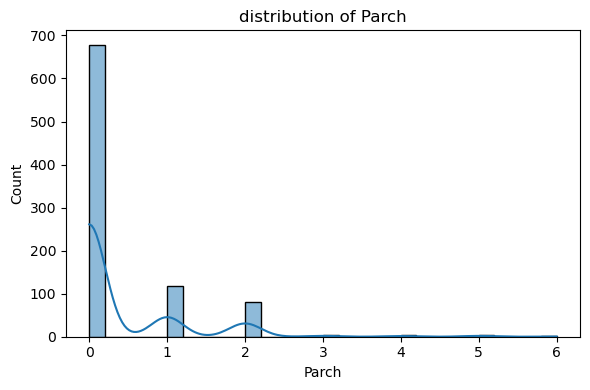

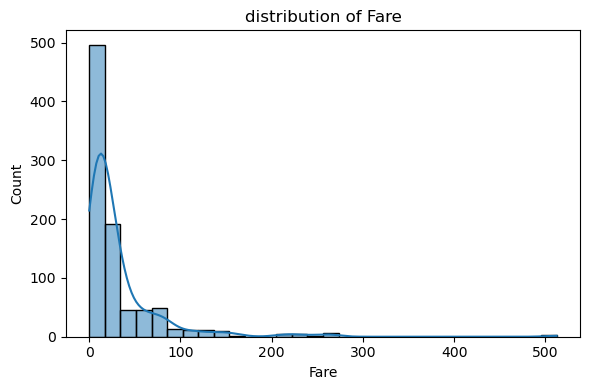

In [11]:
numeric_columns=data.select_dtypes(include=["int64","float64"]).columns
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    plt.title(f"distribution of {col}")
    sns.histplot(data[col],bins=30,kde=True)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [12]:
#From the histogram we can observe that
#The number of people survived is less than the number of not survived
#most of the people are in age of 20-40
#most of the people travelled alone that without siblings and children

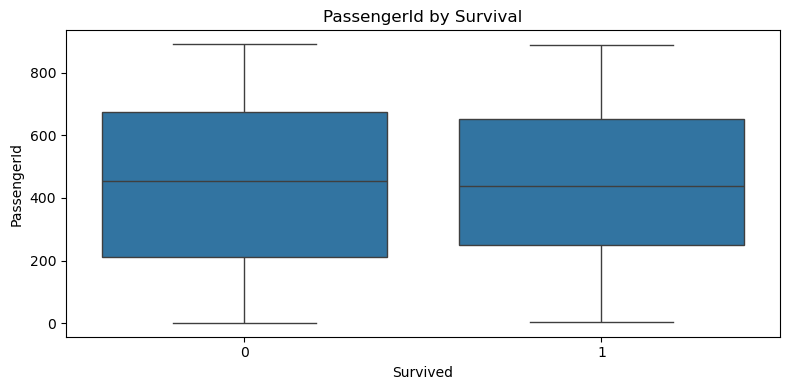

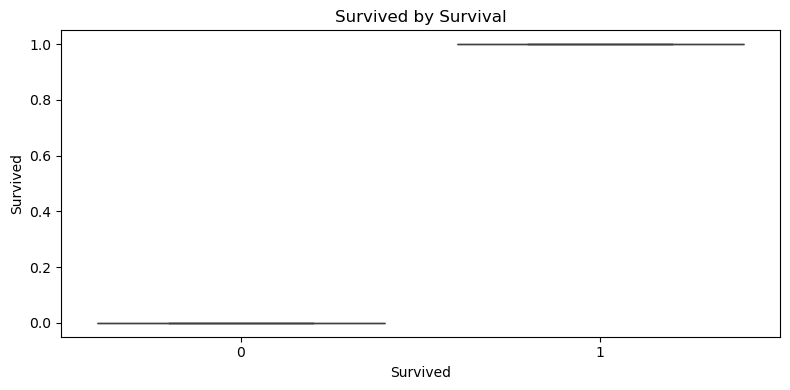

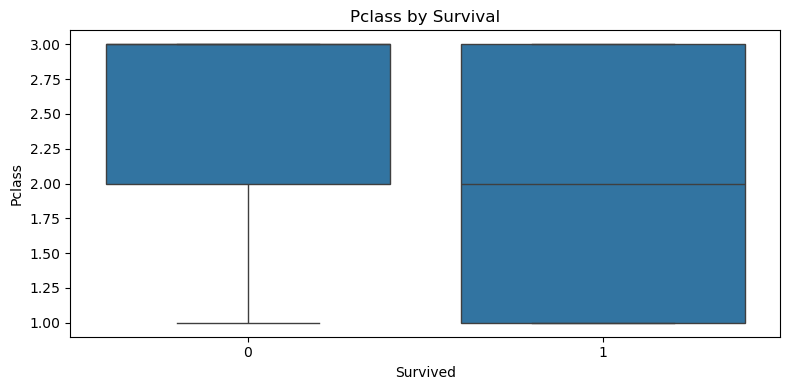

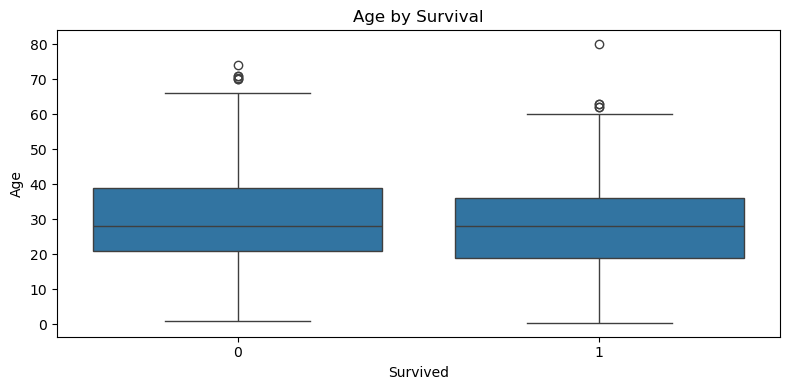

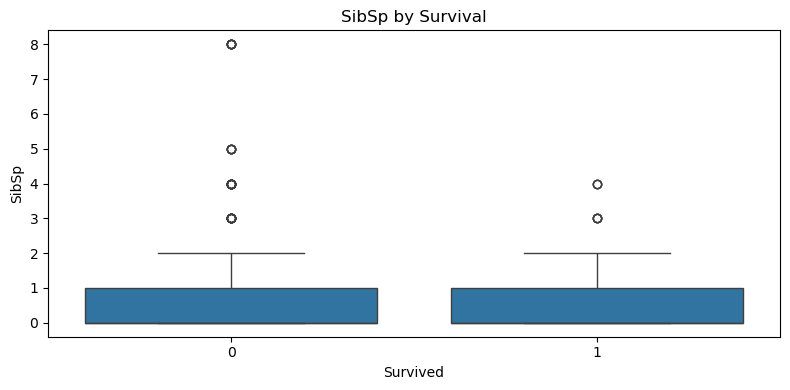

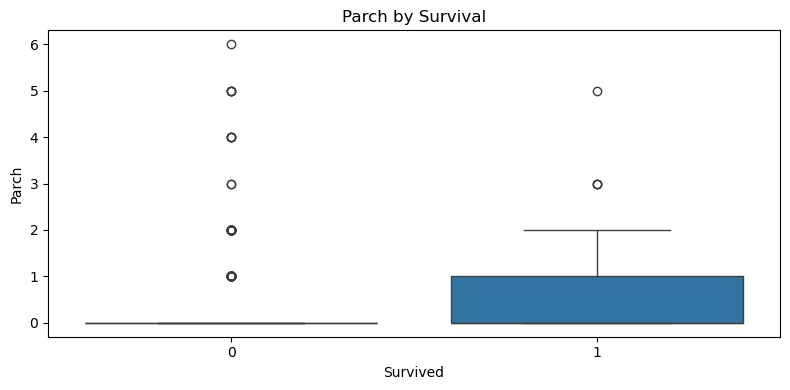

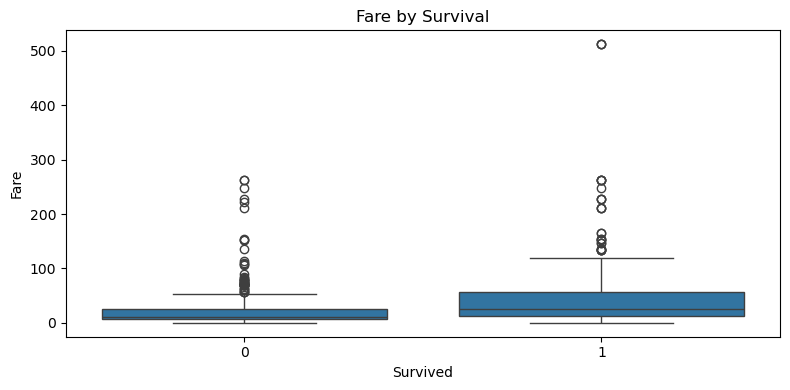

In [13]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Survived', y=col, data=data)
    plt.title(f'{col} by Survival')
    plt.xlabel('Survived')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

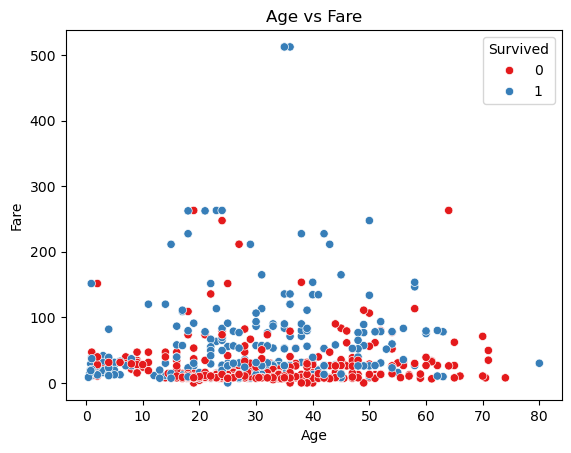

In [14]:
#scatterplot for
import seaborn as sns
import matplotlib.pyplot as plt

#Age vs Fare
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived', palette='Set1')
plt.title('Age vs Fare')
plt.show()


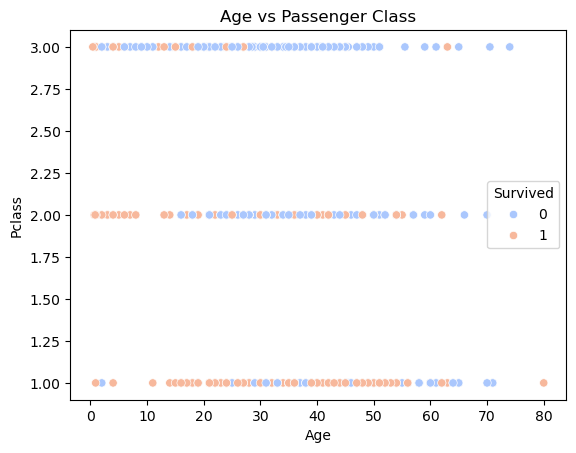

In [15]:
#Age vs passenger class
sns.scatterplot(data=data, x='Age', y='Pclass', hue='Survived', palette='coolwarm')
plt.title('Age vs Passenger Class')
plt.show()


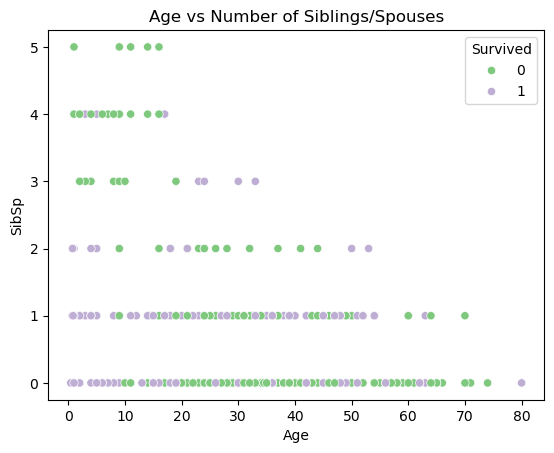

In [16]:
sns.scatterplot(data=data, x='Age', y='SibSp', hue='Survived', palette='Accent')
plt.title('Age vs Number of Siblings/Spouses')
plt.show()


In [17]:
#bar plots

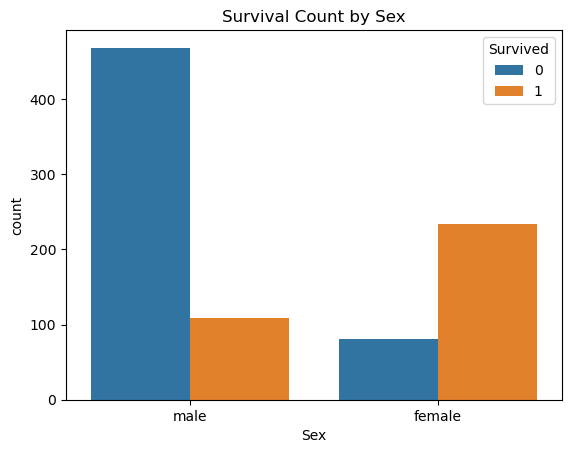

In [18]:
#survival by sez
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Count by Sex')
plt.show()

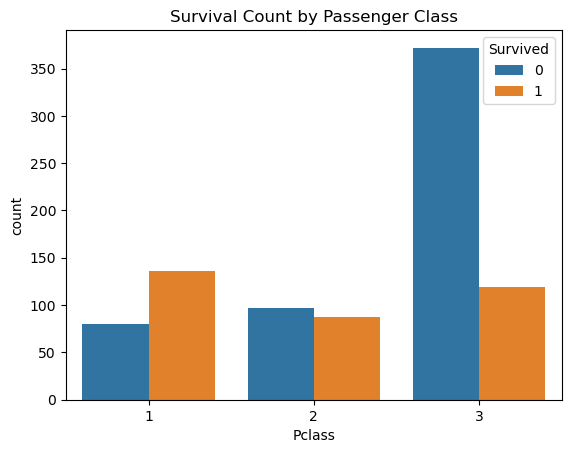

In [19]:
#Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Passenger Class')
plt.show()

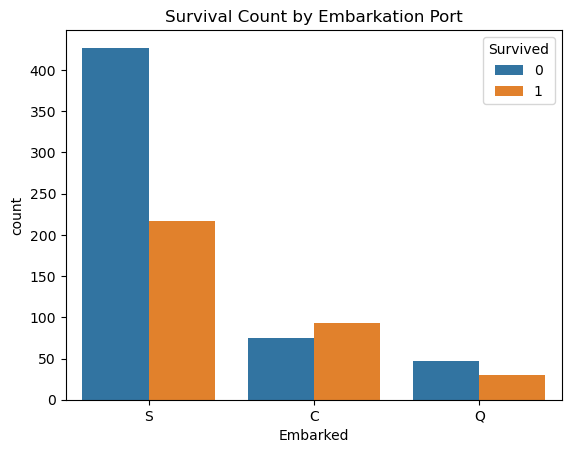

In [20]:
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival Count by Embarkation Port')
plt.show()

# Data Preprocessing:

In [21]:
#Impute missing values.
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
#There are missing values for age,cabin,embarked

#lets fill the missing values for age with median
#lets drop the cabin column as there is more than 50% of the data missing
#lets fill the missing values for embarked with mode

In [23]:
data.drop(columns=["Cabin"],inplace=True)
#Dropping the cabin column as there is more than 50% of the data missing

In [24]:
data.fillna({'Age': data['Age'].median()}, inplace=True)
#filling the missing values for age with median
data.fillna({'Embarked':data["Embarked"].mode()},inplace=True)
#filling the missing values for embarked with mode as its categorical

In [25]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [26]:
#Encode categorical variables using one_hot encoding or label encoding.

In [27]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [28]:
#here we will encode sex and embarked and drop name and ticket as they are not required for us

In [29]:
data.drop(columns=["Name","Ticket"],inplace=True)

In [30]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [31]:
data=pd.get_dummies(data,columns=["Embarked"],drop_first=True).astype(int)

In [32]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22,1,0,7,0,1
1,2,1,1,1,38,1,0,71,0,0
2,3,1,3,1,26,0,0,7,0,1
3,4,1,1,1,35,1,0,53,0,1
4,5,0,3,0,35,0,0,8,0,1


In [33]:
#now our data is ready for model building

In [34]:
#Now we are applying same encoding that we did for training data on testing data as well

In [35]:
test_data = pd.read_csv('Titanic_test.csv')

In [36]:
#dropiing and filling data as sone on test data
test_data.drop(columns=["Cabin"],inplace=True)
test_data.fillna({'Age': test_data['Age'].median()}, inplace=True)
test_data.fillna({'Embarked':test_data["Embarked"].mode()},inplace=True)

In [37]:
#Encoding the same for tset data as well

In [38]:
test_data.drop(columns=["Name","Ticket"],inplace=True)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data=pd.get_dummies(test_data,columns=["Embarked"],drop_first=True)

In [39]:
#now both of our traing and testing data is ready

# Building Predictive Models:


In [40]:
#Split the preprocessed dataset into training and testing sets.
from sklearn.model_selection import train_test_split

x = data.drop('Survived', axis=1)
y = data['Survived']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


In [41]:
#Build predictive models using LightGBM and XGBoost algorithms.
#Train the models on the training set and evaluate their performance on the testing set.

import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)
y_pred_lgb = lgb_model.predict(x_val)

# Evaluation
print("LightGBM Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred_lgb))
print("Precision:", precision_score(y_val, y_pred_lgb))
print("Recall:", recall_score(y_val, y_pred_lgb))
print("F1 Score:", f1_score(y_val, y_pred_lgb))


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 381
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [42]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_val)

# Evaluation
print("\nXGBoost Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Precision:", precision_score(y_val, y_pred_xgb))
print("Recall:", recall_score(y_val, y_pred_xgb))
print("F1 Score:", f1_score(y_val, y_pred_xgb))



XGBoost Performance:
Accuracy: 0.7988826815642458
Precision: 0.7638888888888888
Recall: 0.7432432432432432
F1 Score: 0.7534246575342466


/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:50:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


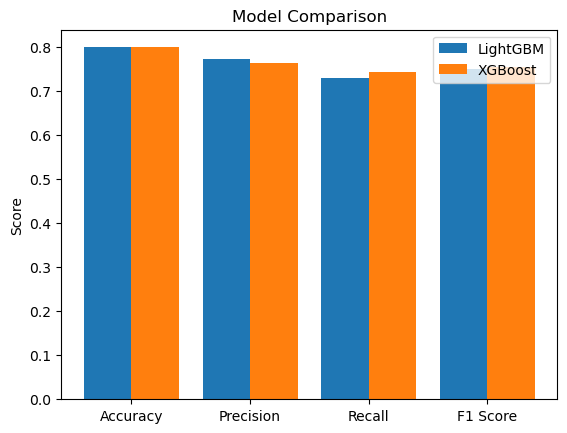

In [43]:
#comparing the results of both the models
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgb_scores = [accuracy_score(y_val, y_pred_lgb), precision_score(y_val, y_pred_lgb),
              recall_score(y_val, y_pred_lgb), f1_score(y_val, y_pred_lgb)]
xgb_scores = [accuracy_score(y_val, y_pred_xgb), precision_score(y_val, y_pred_xgb),
              recall_score(y_val, y_pred_xgb), f1_score(y_val, y_pred_xgb)]

x = range(len(metrics))
plt.bar(x, lgb_scores, width=0.4, label='LightGBM', align='center')
plt.bar([p + 0.4 for p in x], xgb_scores, width=0.4, label='XGBoost', align='center')
plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.show()

In [44]:
from sklearn.model_selection import RandomizedSearchCV

#Defining hyperparameter grid
param_grid_lgb = {
    'num_leaves': [20, 31, 40],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
}

lgb_clf = lgb.LGBMClassifier()

lgb_cv = RandomizedSearchCV(lgb_clf, param_grid_lgb, cv=5, scoring='accuracy', n_iter=10, random_state=42)
lgb_cv.fit(x_train, y_train)

print("Best LightGBM Params:", lgb_cv.best_params_)

#Predicting with best model
y_pred_lgb_cv = lgb_cv.predict(x_val)


[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] 

In [45]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_cv = RandomizedSearchCV(xgb_clf, param_grid_xgb, cv=5, scoring='accuracy', n_iter=10, random_state=42)
xgb_cv.fit(x_train, y_train)

print("Best XGBoost Params:", xgb_cv.best_params_)

#Predicting with best model
y_pred_xgb_cv = xgb_cv.predict(x_val)


/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:50:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:50:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:50:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:50:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

Best XGBoost Params: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7}


/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:50:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:50:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Comparative Analysis:

In [46]:
print("LightGBM Tuned:")
print("Accuracy:", accuracy_score(y_val, y_pred_lgb_cv))
print("Precision:", precision_score(y_val, y_pred_lgb_cv))
print("Recall:", recall_score(y_val, y_pred_lgb_cv))
print("F1 Score:", f1_score(y_val, y_pred_lgb_cv))

print("\nXGBoost Tuned:")
print("Accuracy:", accuracy_score(y_val, y_pred_xgb_cv))
print("Precision:", precision_score(y_val, y_pred_xgb_cv))
print("Recall:", recall_score(y_val, y_pred_xgb_cv))
print("F1 Score:", f1_score(y_val, y_pred_xgb_cv))


LightGBM Tuned:
Accuracy: 0.8156424581005587
Precision: 0.7971014492753623
Recall: 0.7432432432432432
F1 Score: 0.7692307692307693

XGBoost Tuned:
Accuracy: 0.8044692737430168
Precision: 0.819672131147541
Recall: 0.6756756756756757
F1 Score: 0.7407407407407407


In [47]:
#the tuned models have better accuracy score when compared to normal lgb and xgboost models

In [48]:
#Model performance lightgbm

# Accuracy = 0.81564
# About 81.5% of total predictions were correct.

# Precision = 0.7971
# Of all the passengers the model predicted would survive, 79.7% actually did.

# Recall = 0.7432
# Of all passengers who actually survived, the model correctly identified 74.3%.

# F1 Score = 0.7692
# Harmonic mean of precision and recall (balance between the two).



In [49]:
#Model performance xgbm

# Accuracy = 0.8044
# About 80.5% of total predictions were correct.

# Precision = 0.8196
# Of all the passengers the model predicted would survive, 81.96% actually did.

# Recall = 0.6756
# Of all passengers who actually survived, the model correctly identified 67.5%.

# F1 Score = 0.7407
# Harmonic mean of precision and recall (balance between the two).